In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import gridspec
import matplotlib.ticker as mtick
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})


def grids():
    """Applies aesthetic gridding to a subplot axis."""

    ax.minorticks_on()
    ax.tick_params('y', length=8, which='major', labelsize='10')
    ax.tick_params('y', length=3, which='minor')
    ax.tick_params('x', which='both', bottom=False, top=False)
    ax.set_axisbelow(True)
    ax.grid(True, which='major', ls='-', lw=.5, alpha=0.75, zorder=0, color='lightgray')
    ax.grid(True, which='minor', ls=':', alpha=.15, zorder=0, color='lightgray')


def spines():
    for spine in ax.spines.values():
        spine.set_visible(False)


def ticks():
    ax.tick_params(which='both', top=False, left=False, right=False, bottom=False)


def set_gridspec(widths, heights, wspace=0, hspace=0):
    fig = plt.figure(figsize=(sum(widths) + wspace * (len(widths) - 1),
                              sum(heights) + hspace * (len(heights) - 1)))
    gs = gridspec.GridSpec(len(heights), len(widths),
                           height_ratios=heights, width_ratios=widths)
    return fig, gs

In [250]:
payroll_years = range(2011, 2019)

def get_y(a, b):
    return a + b * x

def getPayrollData(year, job_title):
    df = pd.read_csv(f"payroll data/santa-cruz-{year}.csv")
    df_job = df.loc[df['Job Title'].str.lower()==job_title.lower()]
    return df_job

def getPayrollDataStats(year, job_title):
    df = pd.read_csv(f"payroll data/santa-cruz-{year}.csv")
    df_stats = df.loc[df['Job Title'].str.lower()==job_title.lower()].describe()
    return df_stats

def plotPayroll(job_title, pay_kind='Total Pay', color='blue'):
    data = {year: getPayrollDataStats(year, job_title) for year in payroll_years}
    total_median = [data[year][pay_kind].loc['50%'] for year in payroll_years]
    total_min = [data[year][pay_kind].loc['min'] for year in payroll_years]
    total_25 = [data[year][pay_kind].loc['25%'] for year in payroll_years]
    total_75 = [data[year][pay_kind].loc['75%'] for year in payroll_years]
    total_max = [data[year][pay_kind].loc['max'] for year in payroll_years]
#     plt.fill_between(payroll_years, total_25, total_75, color=color, alpha=.25, zorder=0, label='SCPD ' + job_title)
#     plt.fill_between(payroll_years, total_min, total_25, color=color, alpha=.15, zorder=0, label='SCPD ' + job_title)
#     plt.fill_between(payroll_years, total_75, total_max, color=color, alpha=.15, zorder=0, label='SCPD ' + job_title)
    plt.plot(payroll_years, total_median, lw=3, color=color)
    plt.scatter(payroll_years, total_median, facecolors='white', edgecolors='black', zorder=100)

In [251]:
def plotQuantileRegression(job_title, pay_kind='Total Pay', color='blue'):
    data = {year: getPayrollData(year, job_title) for year in payroll_years}
    total_pay = pd.concat([data[year][[pay_kind, 'Year']] for year in payroll_years])
    total_pay = total_pay.rename(columns={pay_kind: 'pay'})
    total_pay['Year'] = total_pay['Year'].astype(float)

    mod = smf.quantreg('pay ~ Year', total_pay)
    res_median = mod.fit(q=.5)
    res_25 = mod.fit(q=.25)
    res_75 = mod.fit(q=.75)
    
    x = np.linspace(total_pay['Year'].min(), total_pay['Year'].max(), 100)
    y_med = res_median.params['Year'] * x + res_median.params['Intercept']
    y_25 = res_25.params['Year'] * x + res_25.params['Intercept']
    y_75 = res_75.params['Year'] * x + res_75.params['Intercept']
    ax.fill_between(x, y_25, y_75, color=color, alpha=0.55)
    

In [252]:
getPayrollData(2018, 'Police Sergeant').describe().loc['max']['Total Pay']

199730.83

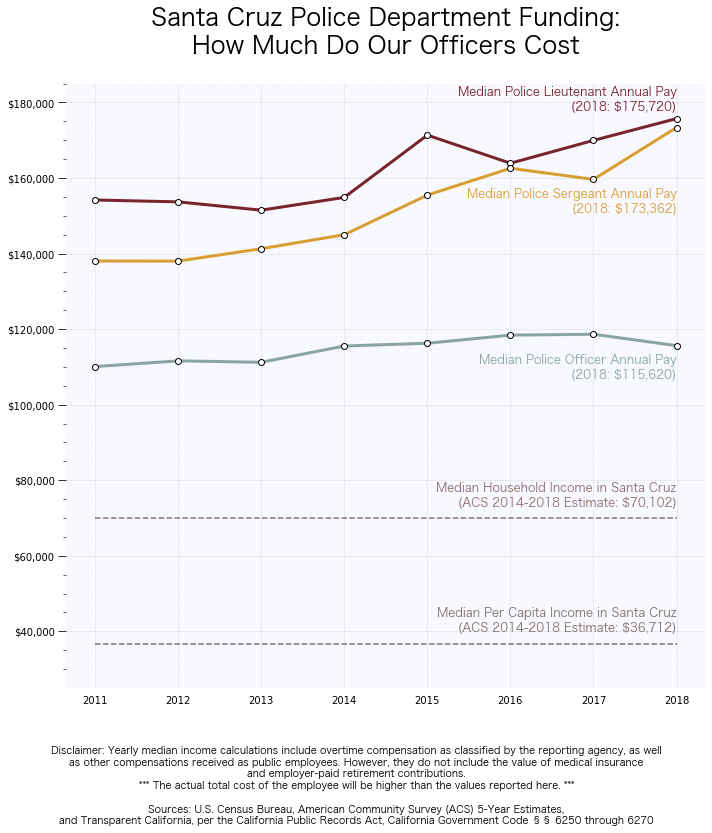

In [271]:
fontname='Hiragino Sans GB'

# Initializing figure.
fig, gs = set_gridspec(widths=[10], heights=[10])

# First figure
ax = fig.add_subplot(gs[0])
grids(); spines()
ax.set_facecolor('ghostwhite')

plotPayroll('Police Lieutenant', color='#78242C')
plotPayroll('Police Sergeant', color='#D99E32')
plotPayroll('Police Officer', color='#8AA3A6')

# plotQuantileRegression('Police Lieutenant', color='#78242C')
# plotQuantileRegression('Police Sergeant', color='#D99E32')
# plotQuantileRegression('Police Officer', color='#8AA3A6')

plt.hlines(36712, min(payroll_years), max(payroll_years), ls='--', color='#807167', label='Median Per Capita Income in Santa Cruz')
plt.hlines(70102, min(payroll_years), max(payroll_years), ls='--', color='#8C6F6C', label='Median Household Income in Santa Cruz')

bbox_props = dict(boxstyle="square, pad=0.3", fc='white', ec='white', lw=1, alpha=0.75)
plt.annotate("Median Per Capita Income in Santa Cruz\n(ACS 2014-2018 Estimate: $36,712)", (2018, 40000), ha="right", color='#807167', fontname=fontname, size=12)
plt.annotate("Median Household Income in Santa Cruz\n(ACS 2014-2018 Estimate: $70,102)", (2018, 73000), ha="right", color='#8C6F6C', fontname=fontname, size=12)

plt.annotate("Median Police Officer Annual Pay\n(2018: $115,620)", (2018, 107000), ha="right", color='#8AA3A6', fontname=fontname, size=12)#, bbox=bbox_props)
plt.annotate("Median Police Sergeant Annual Pay\n(2018: $173,362)", (2018, 151000), ha="right", color='#D99E32', fontname=fontname, size=12)#, bbox=bbox_props)
plt.annotate("Median Police Lieutenant Annual Pay\n(2018: $175,720)", (2018, 178000), ha="right", color='#78242C', fontname=fontname, size=12)#, bbox=bbox_props)

disclaimer_text = """Disclaimer: Yearly median income calculations include overtime compensation as classified by the reporting agency, as well
as other compensations received as public employees. However, they do not include the value of medical insurance
and employer-paid retirement contributions.
*** The actual total cost of the employee will be higher than the values reported here. ***"""

sources_text = "\n\nSources: "
sources_text += "U.S. Census Bureau, American Community Survey (ACS) 5-Year Estimates"
sources_text += ",\nand Transparent California, per the California Public Records Act, California Government Code §§ 6250 through 6270"
fig.text(0.5, -0.15, disclaimer_text + sources_text, ha="center", fontname=fontname)#, size=12, bbox=bbox_props)

ax.set_title('Santa Cruz Police Department Funding:\nHow Much Do Our Officers Cost', pad=30, size=24, fontname=fontname)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_ylim(25000,185000)

plt.savefig("police_earnings.png", dpi=300, bbox_inches='tight')
